# Data Profiling, Cleaning & EDA-Sierraleone
**Objective:** Profile, clean, and explore the solar dataset for Sierraleone so it’s ready for comparison and region-ranking tasks.

This notebook includes:
- Summary statistics and missing-value report
- Outlier detection and cleaning
- Time series analysis
- Correlation and scatter plots
- Wind and temperature analysis
- Bubble charts

## Importing the dependencies

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the Data

In [48]:
# Set both plotting and display settings
import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\Python\Week_01\data\data\sierraleone-bumbuna.csv")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 10)

In [49]:
# Show basic info
print(f"Dataset shape: {df.shape}")
df.info()

Dataset shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  T

In [50]:
#  Display the first 5 rows
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [51]:
# Display the last 10 rows
print("\nLast 10 rows:")
display(df.tail(10))


Last 10 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-10-29 23:51,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525591,2022-10-29 23:52,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525592,2022-10-29 23:53,-1.3,-0.1,-2.4,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525593,2022-10-29 23:54,-1.4,-0.1,-2.5,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.6,NaN
525594,2022-10-29 23:55,-1.5,-0.1,-2.7,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.5,NaN
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [52]:
# Display 10 random sample rows
print("\nRandom sample of 10 rows:")
display(df.sample(10, random_state=42))


Random sample of 10 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
97300,2022-01-05 13:41,778.4,624.8,248.9,872.3,837.0,35.7,22.5,3.3,4.4,0.6,137.9,15.9,997,0,0.0,58.3,55.5,NaN
123024,2022-01-23 10:25,551.6,508.1,206.7,637.6,582.2,26.5,35.3,0.2,1.1,0.4,77.2,6.1,1002,0,0.0,47.6,42.7,NaN
135493,2022-02-01 02:14,-11.4,-0.4,-11.4,0.0,0.0,20.8,89.6,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,19.7,19.8,NaN
514148,2022-10-22 01:09,-5.0,-0.1,-5.3,0.0,0.0,22.6,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,23.0,23.3,NaN
468828,2022-09-20 13:49,482.1,22.3,456.2,484.8,474.9,30.1,73.7,2.3,3.1,0.5,260.8,20.8,998,0,0.0,45.8,47.1,NaN
251778,2022-04-22 20:19,-13.1,-0.6,-13.0,0.0,0.0,29.3,68.4,1.2,1.6,0.3,149.9,4.3,997,0,0.0,28.6,29.0,NaN
32100,2021-11-21 07:01,9.3,0.0,9.2,10.1,9.4,23.1,93.5,0.0,0.0,0.0,0.0,0.0,998,0,0.0,23.3,23.8,NaN
263477,2022-04-30 23:18,-6.9,-0.1,-6.4,0.0,0.0,28.4,74.3,2.5,3.4,0.6,217.6,13.7,1002,0,0.0,28.9,29.1,NaN
152664,2022-02-13 00:25,-11.4,-0.5,-12.0,0.0,0.0,20.7,68.4,0.5,0.7,0.5,52.6,0.5,1001,0,0.0,19.6,20.0,NaN
187318,2022-03-09 01:59,-10.2,-0.4,-9.6,0.0,0.0,23.3,80.8,0.0,0.0,0.0,0.0,0.0,998,0,0.0,22.4,22.7,NaN


## Summary statistics and missing-value report

In [56]:
# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
display(df.describe())


Summary statistics for numeric columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [57]:
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Percentage of missing values per column
null_percent = df.isna().mean() * 100
print("\nPercentage of missing values:")
print((null_percent).round(2))

# Filter columns with more than 5% nulls
cols_with_nulls = null_percent[null_percent > 5].index.tolist()
print("\nColumns with >5% nulls:", cols_with_nulls)

# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)




Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Percentage of missing values:
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

Columns with >5% nu

## Interpretation of Summary statistics and missing-value report

### 1. **General Overview**
- The dataset has 525,600 records — suggests 60 min × 24 hr × 365 days = 1 year of minute-level data.
- No missing numerical data (count = 525,600 for all measured variables).
- Comments column is empty (count = 0); can be dropped
- **Solar data (GHI, DNI, DHI)**: Negative GHI/DNI/DHI values are incorrect entries or sensor noise need correction
- **Module data (ModA, ModB)**: Consistent with irradiance
- **Temperature (Tamb, TModA, TModB)**: Physically valid
- **Humidity (RH)**: Reasonable; 9.9 %(min) low outlier may indicate a dry period or sensor drift.
- **Wind (WS, WSgust, WSstdev, WD, WDstdev)**: Wind readings are consistent; no clear data errors.
- **Pressure (BP)**: Normal atmospheric range at moderate altitude
- **Flags(Cleaning Flag & Precipitation)**: Sparse cleaning events → panels mostly uncleaned., no issues

## Univariate Analysis for Numeric Columns Only


Number of outliers per column:
GHI: 15853
DNI: 101688
DHI: 4407
ModA: 21017
ModB: 20613
WS: 3169
WSgust: 3665
Cleaning: 508
Precipitation: 12069

Rows with flagged incorrect entries:
        Negative_Radiation  Negative_Wind  Invalid_Cleaning  \
0                     True          False             False   
1                     True          False             False   
2                     True          False             False   
3                     True          False             False   
4                     True          False             False   
...                    ...            ...               ...   
525595                True          False             False   
525596                True          False             False   
525597                True          False             False   
525598                True          False             False   
525599                True          False             False   

        Negative_Precipitation  
0                        F

C:\Users\Mogassa\AppData\Local\Temp\ipykernel_4872\3810591542.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_value, inplace=True)
C:\Users\Mogassa\AppData\Local\Temp\ipykernel_4872\3810591542.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

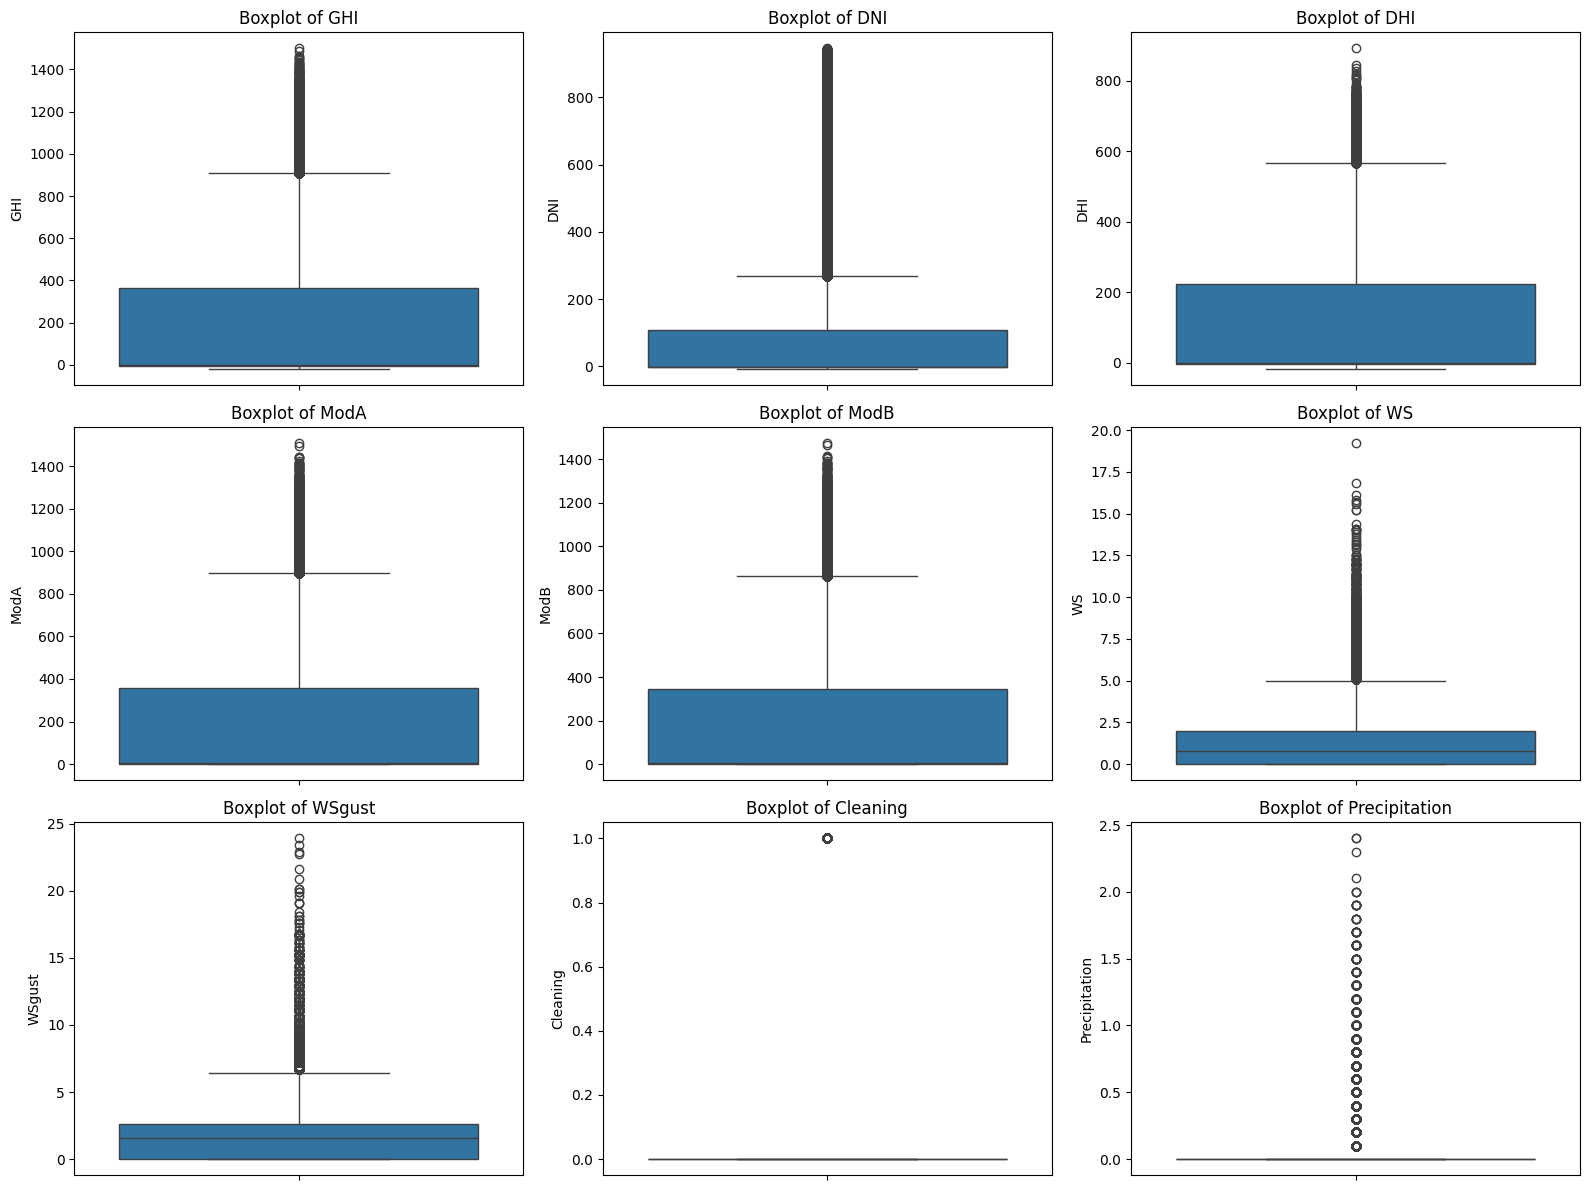

In [ ]:
# Look for missing values, outliers, incorrect entries
cols_radiation = ['GHI', 'DNI', 'DHI']
cols_sensor = ['ModA', 'ModB']
cols_wind = ['WS', 'WSgust']
cols_misc = ['Cleaning', 'Precipitation']

all_cols = cols_radiation + cols_sensor + cols_wind + cols_misc
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Outliers summary
print("\nNumber of outliers per column:")
for col in all_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)}")

# Flag incorrect entries
df_flags = pd.DataFrame(index=df.index)
df_flags['Negative_Radiation'] = (df[cols_radiation] < 0).any(axis=1)
df_flags['Negative_Wind'] = (df[cols_wind] < 0).any(axis=1)
df_flags['Invalid_Cleaning'] = ~df['Cleaning'].isin([0, 1])
df_flags['Negative_Precipitation'] = df['Precipitation'] < 0

print("\nRows with flagged incorrect entries:")
print(df_flags[df_flags.any(axis=1)])

# Compute Z-scores and flag extreme values |Z|>3

cols_zscore = cols_radiation + cols_sensor + cols_wind
df_zscores = df[cols_zscore].apply(zscore)

# Flag extreme values
extreme_flags = (np.abs(df_zscores) > 3)
print("\nNumber of extreme Z-score values per column:")
print(extreme_flags.sum())

# view rows with any extreme Z-score
extreme_rows = df[extreme_flags.any(axis=1)]
print("\nRows with extreme Z-scores (|Z|>3):")
print(extreme_rows)

# Handle missing values
# Option 1: Drop rows with missing values in key columns
# df_cleaned = df.dropna(subset=cols_radiation + cols_sensor + cols_wind)

# Option 2: Impute missing values using median
df_imputed = df.copy()
for col in cols_radiation + cols_sensor + cols_wind + ['Precipitation']:
    median_value = df_imputed[col].median()
    #df_imputed[col].fillna(median_value, inplace=True)
    df_imputed[col] = df_imputed[col].fillna(median_value)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(df_imputed[all_cols].isna().sum())


# ---------------------------
# visualize distributions and outliers
# ---------------------------

for col in all_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_imputed[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
for col in all_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_imputed[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.show()



#### plot time series with highlighted outliers

### Computing Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3.

## Cleaning the Data
### Dropping missing values in key columns

In [ ]:
# Key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Impute missing values with median safely
df_imputed = df.copy()
for col in key_columns:
    median_val = df_imputed[col].median()
    df_imputed[col] = df_imputed[col].fillna(median_val)  # <-- assign back instead of inplace

# Check missing values
print("Missing values after median imputation:")
print(df_imputed[key_columns].isna().sum())

### Cleaning and Exporting cleaned DataFrame to data/benin_clean.csv 

In [ ]:
import os
import pandas as pd
# Ensure the 'data' folder exists inside your workspace
data_folder = r"D:\Python\Week_01\Assignment\solar-challenge-week0\data"
os.makedirs(data_folder, exist_ok=True)
# Key columns for cleaning
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# --- Step 1: Impute missing values with median ---
df_cleaned = df.copy()
for col in key_columns:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)

# --- Step 2: Compute Z-scores and flag outliers ---
df_z = df_cleaned[key_columns].apply(zscore)
outlier_flags = (df_z.abs() > 3)

# Add a column listing which columns are outliers for each row
def get_outlier_cols(row):
    return row.index[row].tolist()

df_cleaned['outlier_columns'] = outlier_flags.apply(get_outlier_cols, axis=1)

# replace outliers with median (you can skip if you just want to flag)
for col in key_columns:
    median_val = df_cleaned[col].median()
    df_cleaned.loc[outlier_flags[col], col] = median_val

# --- Step 4: Summary ---
num_outlier_rows = (outlier_flags.any(axis=1)).sum()
print(f"Number of rows with outliers: {num_outlier_rows}")
print("Missing values after cleaning:")
print(df_cleaned[key_columns].isna().sum())

# Path to save the cleaned CSV
cleaned_csv_path = os.path.join(data_folder, "sierraleone_clean.csv")

# Save the cleaned DataFrame
df_cleaned.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_csv_path}")

### rows were affected by missing values vs. outliers vs. cleaned values

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Key columns to check
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Total rows
total_rows = len(df)

# --- Missing values ---
missing_count_per_column = df[key_columns].isna().sum()
rows_with_missing = df[key_columns].isna().any(axis=1).sum()

# --- Z-score outliers ---
df_z = df[key_columns].apply(zscore)
outlier_flags = df_z.abs() > 3
rows_with_outliers = outlier_flags.any(axis=1).sum()

# --- After cleaning (median imputation and optional outlier replacement) ---
df_cleaned = df.copy()
for col in key_columns:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)
    df_cleaned.loc[outlier_flags[col], col] = median_val

rows_cleaned = (df_cleaned[key_columns] != df[key_columns]).any(axis=1).sum()

# --- Summary report ---
report = pd.DataFrame({
    "Total Rows": [total_rows],
    "Rows with Missing Values": [rows_with_missing],
    "Rows with Outliers": [rows_with_outliers],
    "Rows Cleaned (Imputed or Replaced)": [rows_cleaned]
})

print(report)


## Time Series Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv(r"D:\Python\Week_01\Assignment\solar-challenge-week0\data\benin_clean.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for better plotting
df.set_index('Timestamp', inplace=True)

# Columns to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

# --- Line chart ---
plt.figure(figsize=(15, 6))
for col in columns_to_plot:
    plt.plot(df.index, df[col], label=col)

plt.title("Solar and Temperature Data Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Ensure datetime index
# df = df.set_index('Timestamp')

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Hourly averages
df_hourly = df_numeric.resample('h').mean()

# Plot selected variables
cols_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(15, 6))
for col in cols_to_plot:
    plt.plot(df_hourly.index, df_hourly[col], label=col)

plt.title("Hourly Average Solar and Temperature Data")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Observe patterns by month, trends throughout the day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

In [ ]:
# Group by month and compute mean
monthly_mean = df_numeric.resample('M').mean()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly_mean.index.month, monthly_mean[col], label=col)

plt.title("Monthly Average Trends of Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()

df['hour'] = df.index.hour
hourly_pattern = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(hourly_pattern.index, hourly_pattern[col], label=col)

plt.title("Average Diurnal Pattern (Hourly Averages Across All Days)")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()

# detecting anomalies or peaks
plt.figure(figsize=(15,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', alpha=0.8)
plt.scatter(df_hourly.index[df_hourly['GHI'] > df_hourly['GHI'].quantile(0.99)], 
            df_hourly['GHI'][df_hourly['GHI'] > df_hourly['GHI'].quantile(0.99)],
            color='red', label='Potential Peaks', s=10)
plt.title("GHI with Potential Anomalies (Top 1%)")
plt.xlabel("Timestamp")
plt.ylabel("GHI")
plt.legend()
plt.tight_layout()
plt.show()


### Code to Group by Cleaning Flag

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Cleaning is numeric
df['Cleaning'] = df['Cleaning'].astype(int)

# Group by Cleaning flag
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot comparison
mod_means.plot(kind='bar', figsize=(8,5), rot=0, color=['#4c72b0', '#55a868'])
plt.title("Average Module Output Before and After Cleaning")
plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
plt.ylabel("Average Module Output (W/m²)")
plt.legend(["ModA", "ModB"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: print numerical difference
print("Average ModA/ModB output before vs after cleaning:\n")
print(mod_means)
print("\nChange after cleaning (%):")
print((mod_means.loc[1] - mod_means.loc[0]) / mod_means.loc[0] * 100)


### Correlation & Relationship Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap — Irradiance and Module Temperatures")
plt.tight_layout()
plt.show()

# Define scatter plots
plt.figure(figsize=(15, 10))

# (a) WS vs GHI
plt.subplot(2, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.4)
plt.title("WS vs GHI")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI (W/m²)")

# (b) WSgust vs GHI
plt.subplot(2, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.4, color='orange')
plt.title("WSgust vs GHI")
plt.xlabel("Wind Gust (m/s)")
plt.ylabel("GHI (W/m²)")

# (c) WD vs GHI
plt.subplot(2, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.4, color='green')
plt.title("WD vs GHI")
plt.xlabel("Wind Direction (°)")
plt.ylabel("GHI (W/m²)")

# (d) RH vs Tamb
plt.subplot(2, 3, 4)
plt.scatter(df['RH'], df['Tamb'], alpha=0.4, color='red')
plt.title("RH vs Tamb")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")

# (e) RH vs GHI
plt.subplot(2, 3, 5)
plt.scatter(df['RH'], df['GHI'], alpha=0.4, color='purple')
plt.title("RH vs GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


### visualizing wind behavior and value distributions

In [ ]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Remove invalid data
df_valid = df.dropna(subset=['WS', 'WD'])

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df_valid['WD'], df_valid['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind speed (m/s)", bbox_to_anchor=(1.1, 0))
plt.title("Wind Rose: Wind Speed vs Direction", fontsize=14)
plt.show()


plt.figure(figsize=(12, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'].dropna(), bins=40, kde=True, color='gold')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")

# WS Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['WS'].dropna(), bins=40, kde=True, color='skyblue')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Scatter Plots — RH vs Tamb, RH vs GHI

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# RH vs Temperature
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.3, color='coral')
sns.regplot(x='RH', y='Tamb', data=df, scatter=False, color='black', line_kws={'lw': 2})
plt.title("RH vs Ambient Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.3, color='skyblue')
sns.regplot(x='RH', y='GHI', data=df, scatter=False, color='black', line_kws={'lw': 2})
plt.title("RH vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


### GHI vs. Tamb with bubble size = RH or BP.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter with bubble size = RH
plt.scatter(
    df['Tamb'], df['GHI'],
    s=df['RH'] * 2,          # scale bubble size
    c=df['RH'],              # color by RH
    cmap='coolwarm', alpha=0.6, edgecolors='k'
)

plt.title('GHI vs. Tamb with Bubble Size = RH', fontsize=14)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (GHI, W/m²)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))

plt.scatter(
    df['Tamb'], df['GHI'],
    s=(df['BP'] - df['BP'].min()) / 2,  # normalize pressure to control bubble size
    c=df['BP'], cmap='viridis', alpha=0.6, edgecolors='k'
)

plt.title('GHI vs. Tamb with Bubble Size = BP', fontsize=14)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (GHI, W/m²)')
plt.colorbar(label='Barometric Pressure (hPa)')
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# RH
axes[0].scatter(df['Tamb'], df['GHI'], s=df['RH']*2, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolors='k')
axes[0].set_title('Bubble Size = RH')
axes[0].set_xlabel('Tamb (°C)')
axes[0].set_ylabel('GHI (W/m²)')

# BP
axes[1].scatter(df['Tamb'], df['GHI'], s=(df['BP'] - df['BP'].min())/2, c=df['BP'], cmap='viridis', alpha=0.6, edgecolors='k')
axes[1].set_title('Bubble Size = BP')
axes[1].set_xlabel('Tamb (°C)')
axes[1].set_ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()
